### Graph Objects & Plotly Express Slides

In [ ]:
import seaborn as sns
import pandas as pd

anscombe = sns.load_dataset("anscombe").rename({"dataset": "Dataset"}, axis=1)

anscombe.head()

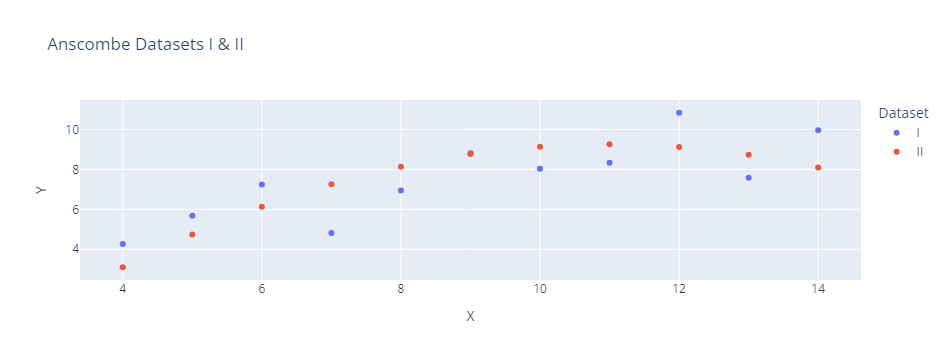

In [2]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_scatter(
    x=anscombe.loc[anscombe["Dataset"] == "I", "x"], 
    y=anscombe.loc[anscombe["Dataset"] == "I", "y"],     
    mode="markers",
    name="I"
)

fig.add_scatter(
    x=anscombe.loc[anscombe["Dataset"] == "II", "x"], 
    y=anscombe.loc[anscombe["Dataset"] == "II", "y"],     
    mode="markers",
    name="II"
)

fig.layout.title = "Anscombe Datasets I & II"
fig.layout.legend.title = 'Dataset'
fig.layout.xaxis.title = "X"
fig.layout.yaxis.title = "Y"

fig.show()

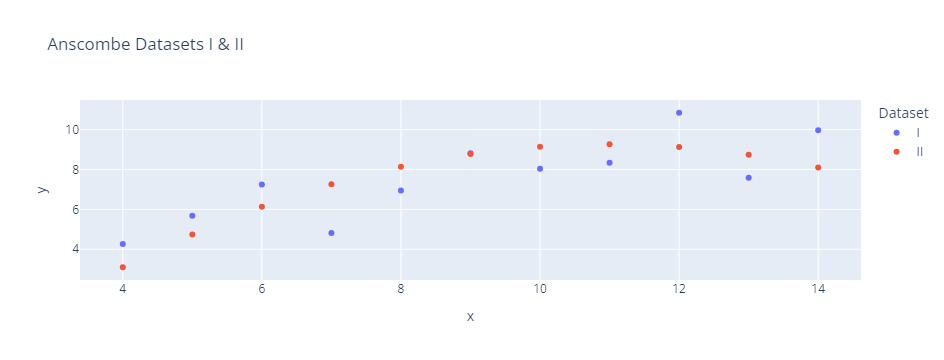

In [3]:
import plotly.express as px

px.scatter(
    anscombe.query("Dataset in ['I', 'II']"),
    x="x",
    y="y",
    color="Dataset",
    title="Anscombe Datasets I & II"
)

### Graph Objects & Plotly Express Demo

In [4]:
import numpy as np

education = (
    pd.read_csv("../data/states_all.csv")
    .assign(
        expenditure_per_student = lambda x: x["TOTAL_EXPENDITURE"] / x["GRADES_ALL_G"],
        above_avg_math8 = lambda x: np.where(
            x["AVG_MATH_8_SCORE"] > x["AVG_MATH_8_SCORE"].mean(),'Above Avg', 'Below Avg'
        )
    )
)


education.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,expenditure_per_student,above_avg_math8
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,3.627221,Below Avg
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,7.939520,Below Avg
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,5.050774,Below Avg
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3.948044,Below Avg
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,5.164536,Below Avg


In [5]:
fig = go.Figure()

fig.add_scatter(
    x=education.loc[education["above_avg_math8"]=="Below Avg", "AVG_MATH_8_SCORE"],
    y=education.loc[education["above_avg_math8"]=="Below Avg", "AVG_READING_8_SCORE"],
    mode="markers",
    marker={"color": "orange"},
    name="Below Avg"
)

fig.add_scatter(
    x=education.loc[education["above_avg_math8"]=="Above Avg", "AVG_MATH_8_SCORE"],
    y=education.loc[education["above_avg_math8"]=="Above Avg", "AVG_READING_8_SCORE"],
    mode="markers",
    marker={"color": "green"},
    name="Above Avg"
)

fig.layout.title = "Relationship between Math, Reading Scores & Student Funding"
fig.layout.legend.title = "Funding"
fig.layout.xaxis.title = "Math"
fig.layout.yaxis.title = "Reading"

fig.show()

In [6]:
px.scatter(
    education,
    x="AVG_MATH_8_SCORE",
    y="AVG_READING_8_SCORE",
    color="above_avg_math8",
    color_discrete_map = {
        "Below Avg": "orange",
        "Above Avg": "green"
    },
    labels={
        "AVG_MATH_8_SCORE": "Math",
        "AVG_READING_8_SCORE": "Reading"
    },
    title="Relationship between Math, Reading Scores & Student Funding",
).update_layout(
#     legend_title="Funding"
    font_color="Green",
    legend_title={
        "text": "Funding",
        "font":{
            "color":"Red",
            "family": "Comic Sans"
        }
    }
)

### Scatterplot Demo

In [7]:
px.scatter(
    education.query("STATE in ['CALIFORNIA', 'FLORIDA', 'TEXAS']"), 
    x="LOCAL_REVENUE", 
    y="STATE_REVENUE",
#     animation_frame="STATE"
#     text="STATE"
    color="STATE",
    trendline="ols",
#     trendline_scope="overall"
    marginal_x="box",
    marginal_y="box",
    hover_name="STATE"
)

### Single Line Chart Demo

In [8]:
px.line(
    (education
     .query("1992 < YEAR < 2017")
     .groupby(["YEAR"], as_index=False)
     .sum()
    ), 
    x="YEAR", 
    y="TOTAL_REVENUE",
    title="EDUCATION REVENUE OVER TIME"
)

### Multiple Series

In [9]:
px.line(
    education.query("STATE in ['CALIFORNIA', 'MASSACHUSETTS']"),
    x="YEAR",
    y="TOTAL_EXPENDITURE",
    color="STATE",
    title="California vs. Massachusetts Total Ed. Spending",
)

In [10]:
px.bar(
    education.query("STATE in ['CALIFORNIA', 'MASSACHUSETTS']"),
    x="YEAR",
    y="TOTAL_EXPENDITURE",
    color="STATE",
    title="California and Massachusetts Total Ed. Spending",
)

In [11]:
px.line(
    (education
     .query("1992 < YEAR < 2017 and STATE in ['CALIFORNIA', 'MASSACHUSETTS']")
     .groupby(["YEAR", "STATE"], as_index=False).sum()), 
    x="YEAR", 
    y="TOTAL_REVENUE",
    color="STATE",
    color_discrete_sequence=px.colors.qualitative.Vivid,
    title="EDUCATION REVENUE OVER TIME"
)

### Grouped Bar Charts

In [12]:
revenue = (
    education
    .query(
        "STATE in ['CALIFORNIA', 'IDAHO', 'MASSACHUSETTS', 'NORTH_CAROLINA'] and YEAR == 2015")
    .melt(
        id_vars="STATE", 
        value_vars=["FEDERAL_REVENUE", "STATE_REVENUE", "LOCAL_REVENUE"],
        var_name="TYPE",
        value_name="REVENUE"
    )
)


px.bar(
    revenue,
    x="STATE",
    y="REVENUE",
    color="TYPE",
    barmode="group",
    title="Revenue Breakdown by State"
)

### Bar Chart Demos

In [19]:
px.bar(
    (education
     .query("STATE in ['CALIFORNIA', 'OREGON', 'WASHINGTON', 'ALABAMA']")
     .groupby("STATE", as_index=False)
     .mean(numeric_only=True)
     .rename({"expenditure_per_student": "Expenditure Per Student (Thousands)"}, axis=1)
     .sort_values("Expenditure Per Student (Thousands)")
    ),
    x="Expenditure Per Student (Thousands)",
    y="STATE",  
    color="AVG_MATH_8_SCORE",
    color_continuous_scale="ylgnbu",
    text_auto='.2f'
)

In [20]:
px.bar(
    education.query("STATE in ['CALIFORNIA', 'OREGON', 'WASHINGTON', 'ALABAMA']"),
    x="YEAR",
    y="TOTAL_EXPENDITURE",
    color="STATE",
    barmode='group'
)

### Pro Tip: Bubble Charts

In [21]:
expenditure =(
    education
    .query("YEAR==2015")
    .loc[: , ["STATE", "TOTAL_EXPENDITURE", "AVG_MATH_8_SCORE", "AVG_READING_8_SCORE"]]
    .dropna()
)
px.scatter(
    expenditure,
    x="AVG_MATH_8_SCORE",
    y="AVG_READING_8_SCORE",
    size="TOTAL_EXPENDITURE",
    trendline="ols",
    title="Math & Reading Scores by Spend"
)

In [22]:
px.scatter(
    education.dropna(),
    x="AVG_MATH_8_SCORE",
    y="AVG_READING_8_SCORE",
    size="expenditure_per_student",
    color="above_avg_math8",
    color_discrete_map = {
        "Below Avg": "orange",
        "Above Avg": "green"
    },
    labels={
        "AVG_MATH_8_SCORE": "Math",
        "AVG_READING_8_SCORE": "Reading"
    },
    title="Relationship between Math, Reading Scores & Student Funding",
).update_layout(
#     legend_title="Funding"
    font_color="Green",
    legend_title={
        "text": "Funding",
        "font":{
            "color":"Red",
            "family": "Comic Sans"
        }
    }
)

### Pie & Donut Charts

In [23]:
px.pie(
    revenue,
    values="REVENUE",
    names="TYPE",
    hole=0.7,
    category_orders={"TYPE": ["STATE_REVENUE", "LOCAL_REVENUE", "FEDERAL_REVENUE"]},
    color_discrete_sequence=px.colors.qualitative.T10,
    title="Revenue Breakdown"
)

In [24]:
px.pie(
    education.query("YEAR == 2017 and STATE in ['CALIFORNIA', 'OREGON', 'WASHINGTON', 'IDAHO', 'WYOMING', 'NORTH_DAKOTA']"), 
    values="GRADES_ALL_G",
    names="STATE",
    color_discrete_sequence=["#32a852", "#3b848a", "#9c3370"],
    hole=.8,
    category_orders={"STATE": ["CALIFORNIA", "WASHINGTON", "OREGON", "IDAHO", "WYOMING", "NORTH_DAKOTA"]}
)

###  Histograms

In [25]:
grades = education[["STATE", "YEAR", "AVG_MATH_4_SCORE"]]

px.histogram(
    grades,
    x="AVG_MATH_4_SCORE", 
    nbins=20,
    histnorm="percent",
    text_auto=True,
    title="4th Grade Math Scores"
)

In [26]:
px.histogram(
    education.query("STATE in ['CALIFORNIA', 'OREGON']"),
    x="expenditure_per_student", 
    color="STATE",
    barmode="overlay",
#     opacity=.9,
    histnorm="percent",
    marginal="rug",
)

### Update Layout & Traces

In [27]:
fig = px.line(
    education.query("STATE in ['CALIFORNIA', 'MASSACHUSETTS']"),
    x="YEAR",
    y="TOTAL_EXPENDITURE",
    color="STATE",
    title="Education Spend by State"
)

fig.update_layout(
    title_font=dict(
        color="grey",
        size=24
    ),
    title={
        "x": .43,
        "y": .9,
        "xanchor": "center"
    },
    legend_title="",
    width=750
)

fig.update_traces(
    mode="lines+markers",
    opacity=.6

)

In [28]:
px.bar(
    (education
     .query("STATE in ['CALIFORNIA', 'FLORIDA', 'TEXAS', 'MAINE']")
     .groupby("STATE", as_index=False)
     .mean(numeric_only=True)
     .rename({"expenditure_per_student": "Expenditure Per Student (Thousands)"}, axis=1)
     .sort_values("Expenditure Per Student (Thousands)")
    ),
    x="Expenditure Per Student (Thousands)",
    y="STATE",
    title="Expenditure Per Student, Select States",
    color="AVG_MATH_8_SCORE",
    color_continuous_scale="ylgnbu",
    text_auto='.2f'
).update_layout(
    title = {
        "x": .5,
        "y": .85,
    },
#     coloraxis_showscale=False,
    coloraxis_colorbar= dict(
        thicknessmode="pixels",
        thickness=20,
        dtick=3,
        ticksuffix=" points",
        title="Math Score"
    )
)

In [29]:
# Setting Defaults

# px.defaults.color_continuous_scale = px.colors.sequential.YlGnBu

# px.defaults.width = 800
# px.defaults.height = 600

### Update Axes

In [30]:
fig.update_xaxes(
    title="Budget Year",
    showgrid=False,
    range=[1991, 2017],
    dtick=4
)

fig.update_yaxes(
    title="Total Expenditure",
    nticks=5
)

### Treating Dates as Text

In [31]:
education2years = (
    education
    .query("STATE in ['CALIFORNIA', 'IDAHO', 'MASSACHUSETTS', 'NORTH_CAROLINA'] and YEAR in [2009, 2011]")
    .loc[:, ["YEAR", "STATE", "INSTRUCTION_EXPENDITURE"]]
).astype({"YEAR": "category"})

px.bar(
    education2years,
    x="YEAR",
    y="INSTRUCTION_EXPENDITURE",
    color="STATE"
).update_xaxes(type="category")

In [32]:
# to reset your color defaults use px.defaults.color_discrete_sequence = px.colors.qualitative.Plotly
# px.defaults.color_discrete_sequence = px.colors.qualitative.T10
# px.defaults.color_discrete_sequence = ["#32a852", "#3b848a", "#9c3370"]
px.line(
    education.query("STATE in ['CALIFORNIA', 'FLORIDA', 'TEXAS', 'MAINE']"),
    x="YEAR",
    y="TOTAL_EXPENDITURE",
    color="STATE"
).update_xaxes(
    dtick=4,
    range=[1992, 2016],
    showgrid=False,
).update_yaxes(
    showticksuffix="last",
    tickprefix="$",
    title="Annual Expenditure",
#     showgrid=False,
)

### Annotations & Adding Traces

In [33]:
fig.add_annotation(
    text="State Budget Crisis",
    x=2008,
    y=78000000,
    arrowhead=2
)

In [34]:
mean_spending_ca = education.loc[education["STATE"]== 'CALIFORNIA', "TOTAL_EXPENDITURE"].mean()

reference_line = go.Scatter(
    x=(1992, 2016),
    y=(mean_spending_ca, mean_spending_ca),
    mode="lines",
    line={'color': 'grey', 'dash': 'dash'},
    name="CA Average"
#     showlegend=False
)

fig.add_trace(reference_line)

In [35]:
px.bar(
    (education
     .query("STATE in ['CALIFORNIA', 'FLORIDA', 'TEXAS', 'MAINE']")
     .groupby("STATE", as_index=False)
     .mean(numeric_only=True)
     .rename({"expenditure_per_student": "Expenditure Per Student (Thousands)"}, axis=1)
     .sort_values("Expenditure Per Student (Thousands)")
    ),
    x="Expenditure Per Student (Thousands)",
    y="STATE",
    title="Expenditure Per Student, Select States",
    color="AVG_MATH_8_SCORE",
).add_annotation(
    text="Despite High Expenditure, <br>California Lags Behind states with less funding",
    showarrow=False,
    x=5,
#     y="California",
    y=2,
    yanchor="top",
    align="left"
).add_vline(
    x=education["expenditure_per_student"].mean(),
    line_dash="dash",
    line_color="orange"
).add_vrect(
    x0=education["expenditure_per_student"].mean(),
    x1=11.3,
    fillcolor="green",
    opacity=.3,
)

### Choropleth Maps

In [36]:
fast_food_by_state =(
    pd.read_csv("../data/Fast_Food_Restaurants_US.csv")
    .groupby("province")
    .agg(restaurant_count = ("name", "count"))
    .reset_index()
)

px.choropleth(
    fast_food_by_state, 
    locations="province",
    color="restaurant_count",
    locationmode="USA-states",
    scope="usa",
    title="Fast Food Restaurants by State"
)

In [37]:
state_dict = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [38]:
education_map = (
    education
    .query("STATE not in ['DODEA', 'NATIONAL']")
    .assign(STATE_CODE = education["STATE"].str.replace("_", " ").str.title().replace(state_dict))
)

education_map.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,expenditure_per_student,above_avg_math8,STATE_CODE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,3.627221,Below Avg,AL
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,7.939520,Below Avg,AK
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,5.050774,Below Avg,AZ
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3.948044,Below Avg,AR
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,5.164536,Below Avg,CA


In [39]:
px.choropleth(
    education_map,
    locations="STATE_CODE",
    color="AVG_MATH_8_SCORE",
    animation_frame="YEAR",
    color_continuous_scale="RdYlGn", #Inferno, Viridis
    locationmode="USA-states", #‘ISO-3’, ‘USA-states’, ‘country names’
    scope="usa", # 'world', 'usa', 'europe', 'asia', 'africa', 'north america', 'south america'.
    range_color=(260, 300),
    title="Score by State"
)